# Temporary Title

## Packages (numpy, matplotlib, pandas)

### numpy

In [1]:
import numpy as np 

counts = [2, 3, 7, 5, 8, 10, 5, 6]
mean = np.mean(counts)
logs = np.log(counts)
cosines = np.cos(counts)
print(mean, logs, cosines)

5.75 [0.69314718 1.09861229 1.94591015 1.60943791 2.07944154 2.30258509
 1.60943791 1.79175947] [-0.41614684 -0.9899925   0.75390225  0.28366219 -0.14550003 -0.83907153
  0.28366219  0.96017029]


### matplotlib

Ways to bring it in:

```python
%matplotlib inline  # antiquated method

import matplotlib.pyplot as plt

import pandas as pd
```

Yes, importing `pandas` will give you access to matplot functions

#### Examples

In [2]:
import pandas as pd

In [3]:
x = np.linspace(0, 1, 300)
y = []

for w in range(2, 6, 2):
    y.append(np.sin(np.pi * x) * np.sin(2 * w * np.pi * x))

In [4]:
df = pd.DataFrame({'x': x, 'y1': y[0], 'y2': y[1]});

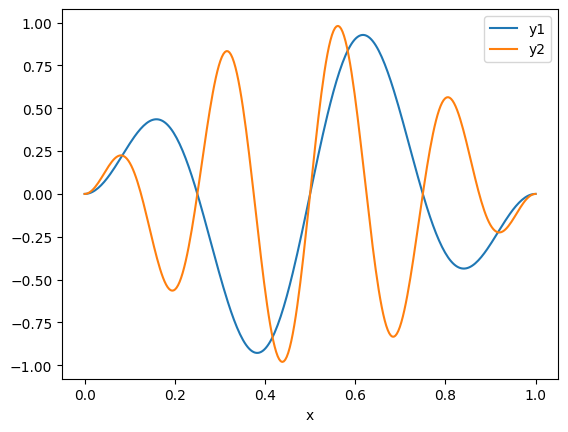

In [5]:
df.plot(x='x');

For higher resolution images, you can use `%config InlineBackend.figure_format = 'retina'`

Looking at the smaller ones might look blurry on high-res screens.

### pandas (with a splash of numpy - `.r_[]`)

#### CSV Stuff (read, info, etc.)

##### Read CSVs

In [6]:
import pandas as pd
csvPath = './datasets/uci-breast-cancer/cancer_data.csv'
data = pd.read_csv(csvPath)  # transform csv into pandas DataFrame

data.head()  # show first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# print col labels
for i, label in enumerate(data.columns):
    print(i, label)

0 id
1 diagnosis
2 radius_mean
3 texture_mean
4 perimeter_mean
5 area_mean
6 smoothness_mean
7 compactness_mean
8 concavity_mean
9 concave points_mean
10 symmetry_mean
11 fractal_dimension_mean
12 radius_se
13 texture_se
14 perimeter_se
15 area_se
16 smoothness_se
17 compactness_se
18 concavity_se
19 concave points_se
20 symmetry_se
21 fractal_dimension_se
22 radius_worst
23 texture_worst
24 perimeter_worst
25 area_worst
26 smoothness_worst
27 compactness_worst
28 concavity_worst
29 concave points_worst
30 symmetry_worst
31 fractal_dimension_worst
32 Unnamed: 32


In [8]:
'''
Params:
- filepath = c'mon
- sep = delimiter
- header = row to be used as header (0 by default)
- index_col = 1 or more columns to be the index of the dataframe
    - you can specify multiple by doing index_col=['Name', 'ID']
    - can also do ints for the index of the... thing you want to index with
- names = list of labels for each col
    - replace header line by using the header override, .e.g. f=pd.read_csv(..., header=0, names=list1)
'''

try: 
    pd.read_csv(filepath=csvPath, sep=",", header=0, index_col="this", names=["this", "that", "other"])
except:
    print("This does nothing")

This does nothing


Some more examples:

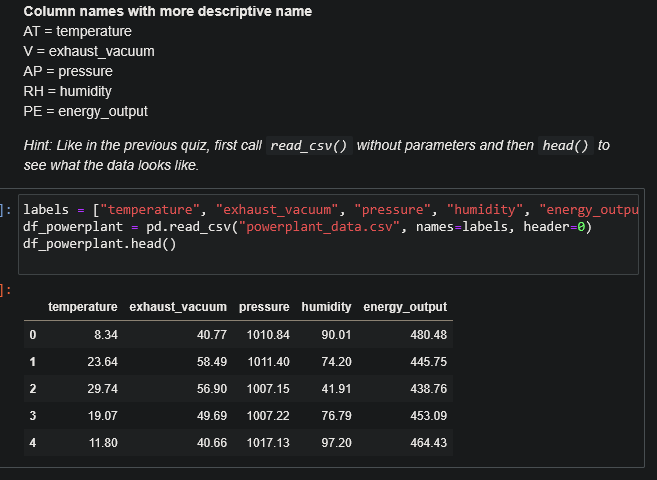

##### Write CSVs

In [9]:
firstFive = (pd.read_csv('./datasets/uci-breast-cancer/cancer_data.csv', index_col=0)).head()

outputPath = "./datasets/uci-breast-cancer/first_five.csv"
print("Writing to", outputPath)
firstFive.to_csv(outputPath, index=False)  # will ignore the index

secondFive = (pd.read_csv(outputPath, index_col=0)).head()

Writing to ./datasets/uci-breast-cancer/first_five.csv


#### Useful DataFrame Attribs/Methods

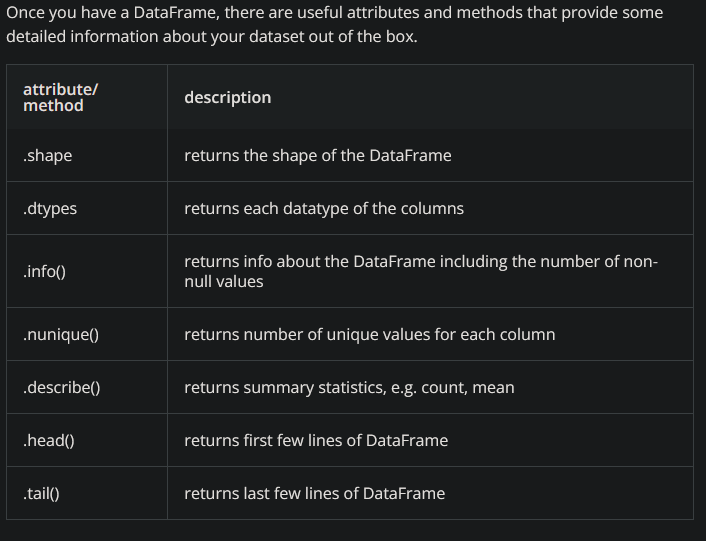

In [10]:
import pandas as pd

df = pd.read_csv('./datasets/uci-breast-cancer/cancer_data.csv')

In [11]:
df.shape  # tuple of the (rows, cols)

(569, 33)

In [12]:
df.dtypes  # datatype for each col

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
type(df['diagnosis'][0])  # returns a string, but the above shows as type "object"
# this is because pandas is storing a pointer to the string in the dataframe


str

In [14]:
df.info()  # summary of dataframe (number of entries, cols, each col label, datatypes, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
df.nunique()  # number of unique datatypes per col

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [16]:
df.tail(2)  # return the last two - also works with head and any int 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039,NaN


#### Indexing and Selecting Data

In [17]:
# print all column labels w/ index
for i, col in enumerate(df.columns):
    print(i, col)

0 id
1 diagnosis
2 radius_mean
3 texture_mean
4 perimeter_mean
5 area_mean
6 smoothness_mean
7 compactness_mean
8 concavity_mean
9 concave points_mean
10 symmetry_mean
11 fractal_dimension_mean
12 radius_se
13 texture_se
14 perimeter_se
15 area_se
16 smoothness_se
17 compactness_se
18 concavity_se
19 concave points_se
20 symmetry_se
21 fractal_dimension_se
22 radius_worst
23 texture_worst
24 perimeter_worst
25 area_worst
26 smoothness_worst
27 compactness_worst
28 concavity_worst
29 concave points_worst
30 symmetry_worst
31 fractal_dimension_worst
32 Unnamed: 32


##### Selecting Data (`loc`, `iloc`, `Numpy.r_[]`)

`loc` uses labels of rows/cols while `iloc` uses index numbers. This is akin to how Python lets you select subsets of lists

In [18]:
df_means = df.loc[:,'id':'fractal_dimension_mean']  # select everything from ID to fractal_dimension_mean
df_means.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871


In [19]:
df_means = df.iloc[:,:12]
df_means.head(1)

# save for future use
df_means.to_csv('./datasets/uci-breast-cancer/cancer_data_means.csv', index=False)

Multiple ranges can be selected using `Numpy.r_[]`, which "translates slice objects to contactenation along the first axis."

Example:

In [20]:
np.r_[:2, 4:6]  # 0-2 exclusive, then 4-6 exclusive

array([0, 1, 4, 5])

This resulting array can be treated as an array of indexes, which can then be passed to `iloc` to select and store that data!

In [21]:
df_stderr = df.iloc[:, np.r_[0:2, 12:22]]  # now isn't that something!
df_stderr.head(1)

,id,diagnosis,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,842302,M,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193


#### Data Cleaning

Reasons to clean:
- Incorrect data types
- Missing Data
- Duplicates
- Structural issues (different col names, mismatched number of records)

##### Missing Data

How many null values are there (NaN, etc.). Find this with `.info()` 

Remedy this with
- Imputing with the mean - get the mean, then use `.fillna(mean)`

In [22]:
import pandas as pd

df = pd.read_csv('./datasets/cleaning/clean-me-baddata.csv') 

df.info()  # 7 rows, col2 has 2 null values, col3 has 1.
# Also, the data types are messed up, but that will be handled later


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    7 non-null      int64  
 1   col2    5 non-null      float64
 2   col3    6 non-null      float64
 3   col4    7 non-null      int64  
 4   col5    7 non-null      int64  
dtypes: float64(2), int64(3)
memory usage: 408.0 bytes


In [23]:
mean = df['col2'].mean()
df['col2'] = df['col2'].fillna(int(mean))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    7 non-null      int64  
 1   col2    7 non-null      float64
 2   col3    6 non-null      float64
 3   col4    7 non-null      int64  
 4   col5    7 non-null      int64  
dtypes: float64(2), int64(3)
memory usage: 408.0 bytes


##### Duplicates

In [24]:
df.duplicated()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
dtype: bool

In [25]:
(df.drop_duplicates()).info()  # drops 2 entries

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5 non-null      int64  
 1   col2    5 non-null      float64
 2   col3    4 non-null      float64
 3   col4    5 non-null      int64  
 4   col5    5 non-null      int64  
dtypes: float64(2), int64(3)
memory usage: 240.0 bytes


In [26]:
tmp = df.copy()  # doing this to not break the df DataFrame
tmp.drop_duplicates(inplace=True)  # this will remove the duplicates in the dataframe

tmp.info()
del tmp

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5 non-null      int64  
 1   col2    5 non-null      float64
 2   col3    4 non-null      float64
 3   col4    5 non-null      int64  
 4   col5    5 non-null      int64  
dtypes: float64(2), int64(3)
memory usage: 240.0 bytes


##### Incorrect Data Types

In [27]:
# Ex: convert string to timestamp - you'll have to do this when you read in from a CSV
# unless you use parse_dates or whatever

# df['date'] = df['date'].to_datetime()

Check that:
- Datetimes are not strings

##### Example: Basic Data Cleaning (`cancer_data_means.csv`)

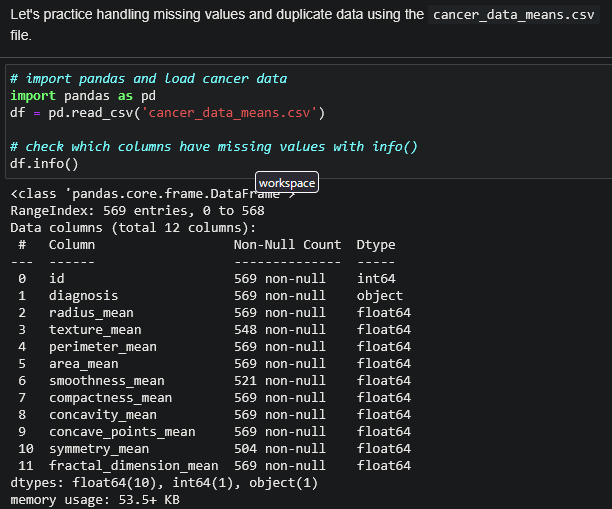

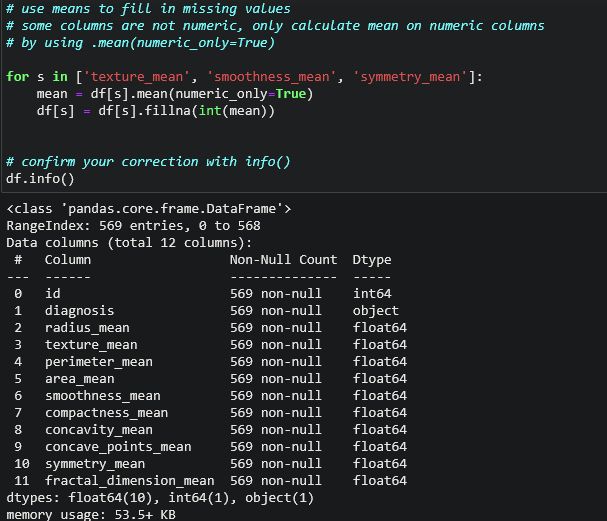

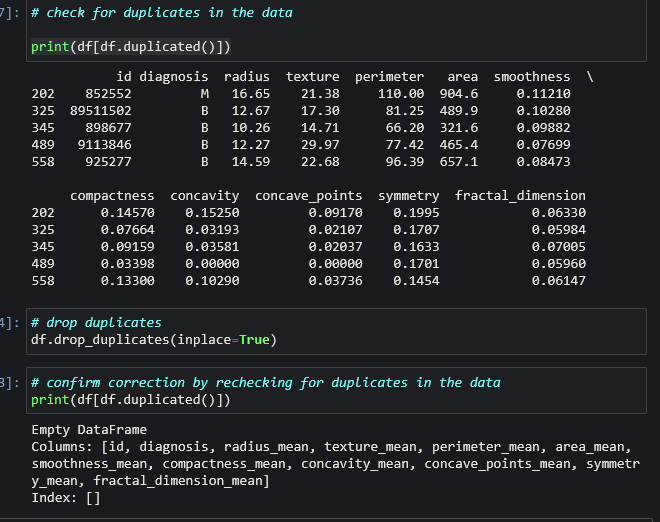

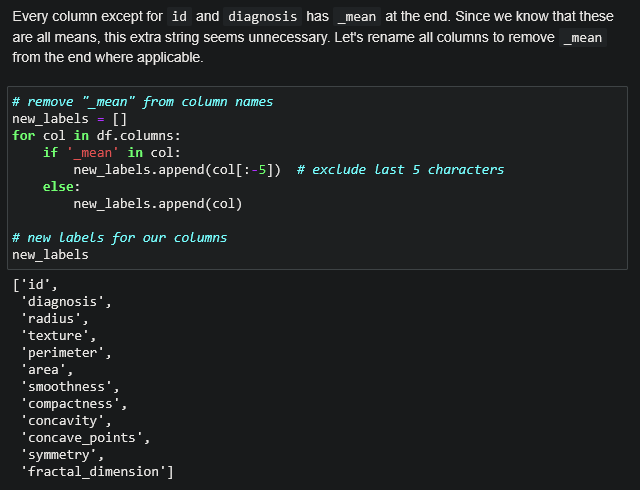

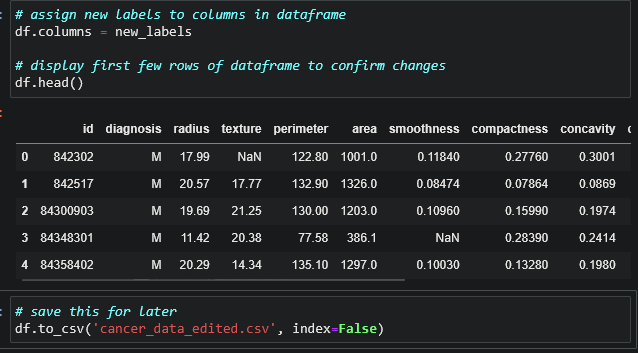

#### Dropping/Renaming Columns

Useful for when you are trying to merge datasets that either have extraneous columns or ones with different names

##### Dropping

Drop what's not consistent or relevant

In [31]:
try:
    df.drop(['example-label1', 'example-label2'], axis=1, inplace=True)  # it's that simple
    # axis - 0=index 1=columns
    # inplace - default False - return a copy, otherwise do operation in place and return None

    df.head(1)  # check it real quick
except:
    print("yeah, it doesn't work for multiple reasons")

yeah, it doesn't work for multiple reasons


##### Renaming

#### Concatentation/Merging (joins)

#### Explode

## Neat Notebook Tricks

### `%timeit` - measure performance

`%%timeit` for a whole cell to run

`%timeit` for a single line to run

In [28]:
%%timeit
from math import sqrt

def fibo1(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    return fibo1(n-1) + fibo1(n-2)

def fibo2(n):
    return ((1+sqrt(5))**n-(1-sqrt(5))**n)/(2**n*sqrt(5))   

560 ns ± 34.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [29]:
%timeit fibo1(20)

NameError: name 'fibo1' is not defined

In [ ]:
%timeit fibo2(20)

529 ns ± 6.33 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### `%pdb` - Debugging in the notebook

Interactive debugger using `%pdb` that lets you inspect vars in the current namespace in the current namespace. 

Makes it convenient for screw-ups like me who would end up making a bunch of `print()` statements.

In **vscode**, the debugger will pop-up towards the top by the searchbar/command palette area.

[Documentation here](https://docs.python.org/3/library/pdb.html)

In [ ]:
%pdb

Automatic pdb calling has been turned ON


In [ ]:
ex = "debug me"
breakTheThing = 1/0

ZeroDivisionError: division by zero

> c:\users\ethan\appdata\local\temp\ipykernel_14524\3195429164.py(2)<module>()

'debug me'
*** NameError: name 'breakThething' is not defined
*** NameError: name 'breakTheThing' is not defined


In [ ]:
%pdb

Automatic pdb calling has been turned OFF


### Converting to new formats (and command execution, apparently)

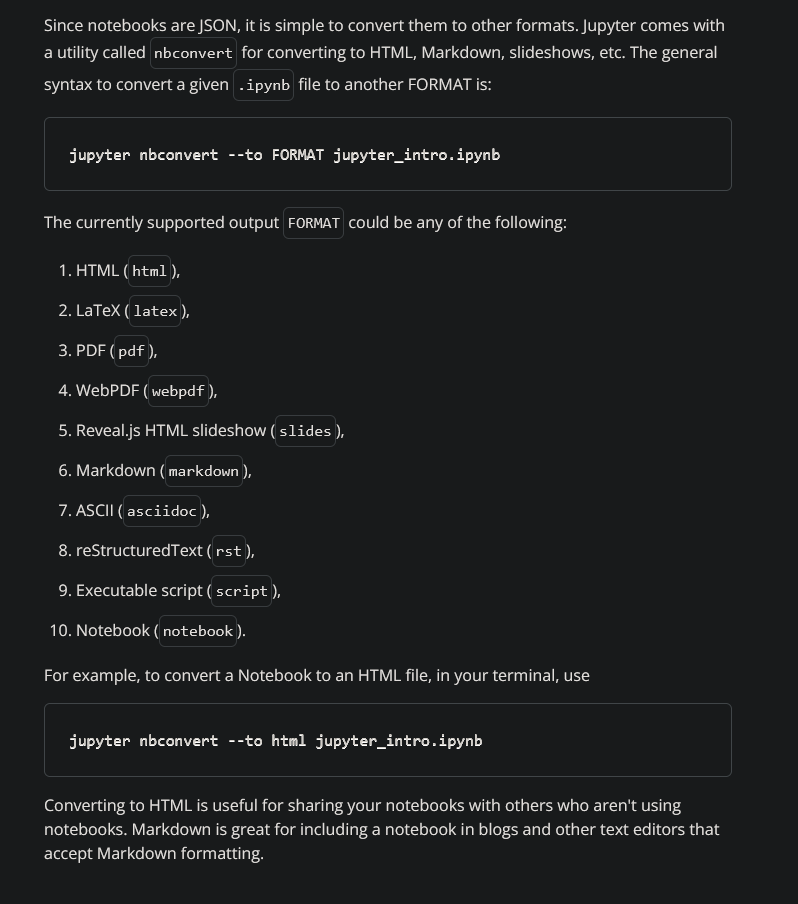

In [ ]:
!jupyter nbconvert --to html scratchpap-but-jupyter.ipynb

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.


In [ ]:
# wild that you can just run commands in here

!ping 127.0.0.1  


Pinging 127.0.0.1 with 32 bytes of data:
Reply from 127.0.0.1: bytes=32 time<1ms TTL=128
Reply from 127.0.0.1: bytes=32 time<1ms TTL=128
Reply from 127.0.0.1: bytes=32 time<1ms TTL=128
Reply from 127.0.0.1: bytes=32 time<1ms TTL=128

Ping statistics for 127.0.0.1:
    Packets: Sent = 4, Received = 4, Lost = 0 (0% loss),
Approximate round trip times in milli-seconds:
    Minimum = 0ms, Maximum = 0ms, Average = 0ms
